In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_results = pd.read_csv('../results/train_results.csv', index_col=0, parse_dates=True)
test_results = pd.read_csv('../results/test_results.csv', index_col=0, parse_dates=True)
original_data = pd.read_csv('../data/btcusdt_1m.csv', index_col=0, parse_dates=True)

# Drop columns that are not needed in the original data
original_data['price'] = original_data['Open']
original_data = original_data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

# Resample the original data to hourly intervals
original_data_hourly = original_data.resample('1H').first()
print(original_data_hourly.head())

# Create the forward looking periods (actual_1, actual_2, etc.
intervals = [1, 2, 4, 6, 8]
selected_data = original_data_hourly.copy()
interval_data = {}

# Add the 'price' column to the interval_data dictionary
interval_data['price'] = selected_data['price']

for interval in intervals:
    interval_data[f'actual_{interval}'] = selected_data['price'].shift(-interval)

interval_df = pd.DataFrame(interval_data, index=selected_data.index)

print(interval_df.loc['01-11-2021'])
print(train_results.head())




In [ ]:
print(interval_df.loc['2021-01-11 07:00:00+00:00'])
print(train_results.head())

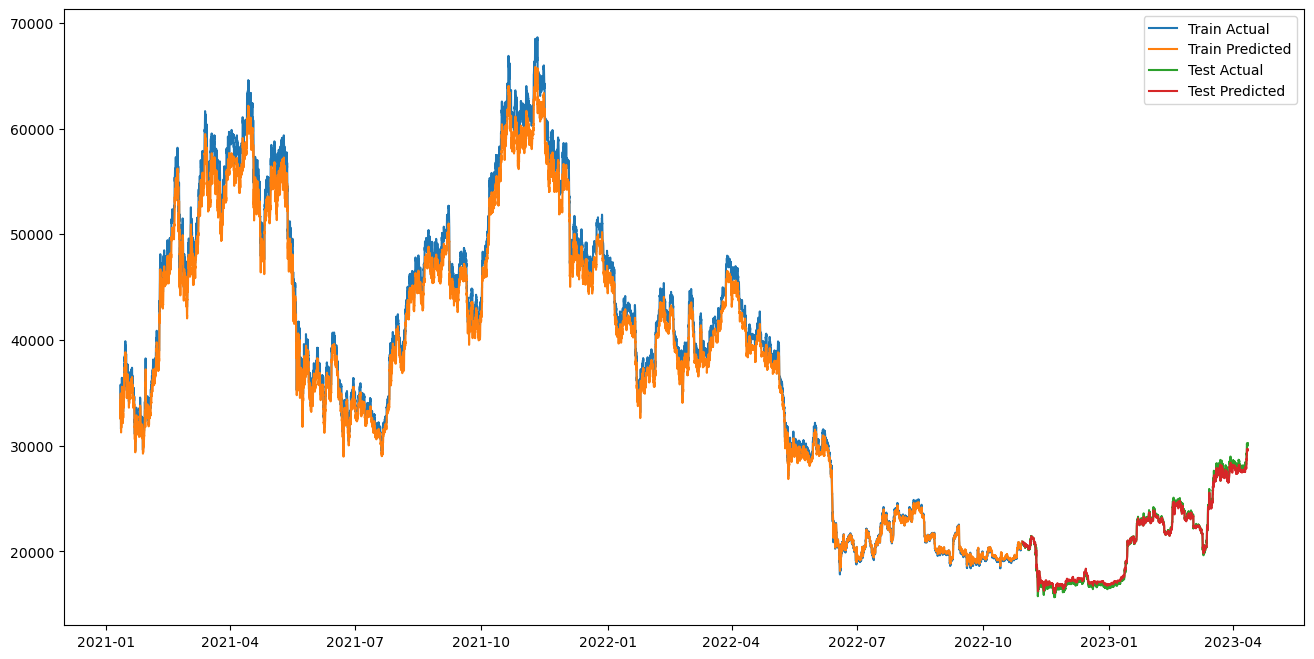

In [4]:
interval_to_plot = 1  # Replace with the desired interval number
plt.figure(figsize=(16, 8))
plt.plot(train_results.index, train_results[f'actual_{interval_to_plot}'], label='Train Actual')
plt.plot(train_results.index, train_results[f'predicted_{interval_to_plot}'], label='Train Predicted')
plt.plot(test_results.index, test_results[f'actual_{interval_to_plot}'], label='Test Actual')
plt.plot(test_results.index, test_results[f'predicted_{interval_to_plot}'], label='Test Predicted')
plt.legend()
plt.show()


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

interval_to_evaluate = 1  # Replace with the desired interval number

y_actual_train = train_results[f'actual_{interval_to_evaluate}']
y_predicted_train = train_results[f'predicted_{interval_to_evaluate}']

y_actual_test = test_results[f'actual_{interval_to_evaluate}']
y_predicted_test = test_results[f'predicted_{interval_to_evaluate}']

mse_train = mean_squared_error(y_actual_train, y_predicted_train)
mse_test = mean_squared_error(y_actual_test, y_predicted_test)

mae_train = mean_absolute_error(y_actual_train, y_predicted_train)
mae_test = mean_absolute_error(y_actual_test, y_predicted_test)

r2_train = r2_score(y_actual_train, y_predicted_train)
r2_test = r2_score(y_actual_test, y_predicted_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)
print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)


Train MSE: 1707005.641746112
Test MSE: 74470.64069540463
Train MAE: 1069.2151064626719
Test MAE: 227.26856246819335
Train R-squared: 0.9898670213873625
Test R-squared: 0.9954250435860302


In [12]:
# ...

# Create a new DataFrame to store actual and predicted prices
results_df = pd.DataFrame(index=test_results.index)

# Calculate actual and predicted price changes for each interval
for i, interval in enumerate(intervals):
    # Calculate the differences (changes) for actual and predicted prices
    actual_changes = np.diff(test_results[f'actual_{interval}'].values)
    predicted_changes = np.diff(test_results[f'predicted_{interval}'].values)

    # Add the calculated changes as new columns in the DataFrame
    results_df[f'actual_changes_{interval}h'] = np.concatenate(([np.nan], actual_changes))
    results_df[f'predicted_changes_{interval}h'] = np.concatenate(([np.nan], predicted_changes))

# Display the resulting DataFrame
print(results_df.head())



                           actual_changes_1h  predicted_changes_1h  \
Open time                                                            
2022-10-29 23:00:00+00:00                NaN                   NaN   
2022-10-30 00:00:00+00:00              51.89               -54.193   
2022-10-30 01:00:00+00:00             -99.11                 7.912   
2022-10-30 02:00:00+00:00              67.78               -49.649   
2022-10-30 03:00:00+00:00             -24.95                17.690   

                           actual_changes_2h  predicted_changes_2h  \
Open time                                                            
2022-10-29 23:00:00+00:00                NaN                   NaN   
2022-10-30 00:00:00+00:00             -99.11               -52.408   
2022-10-30 01:00:00+00:00              67.78                 5.715   
2022-10-30 02:00:00+00:00             -24.95               -49.111   
2022-10-30 03:00:00+00:00              22.10                14.592   

                  

   interval  mean  min  max
0       1.0   NaN -inf  inf
1       2.0   NaN -inf  inf
2       4.0   NaN -inf  inf
3       6.0   NaN -inf  inf
4       8.0   NaN -inf  inf


/var/folders/dt/m1bsm13n187d7m0ssssp79ww0000gn/T/ipykernel_47383/57064013.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(stats, ignore_index=True)
/var/folders/dt/m1bsm13n187d7m0ssssp79ww0000gn/T/ipykernel_47383/57064013.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(stats, ignore_index=True)
/var/folders/dt/m1bsm13n187d7m0ssssp79ww0000gn/T/ipykernel_47383/57064013.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(stats, ignore_index=True)
/var/folders/dt/m1bsm13n187d7m0ssssp79ww0000gn/T/ipykernel_47383/57064013.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

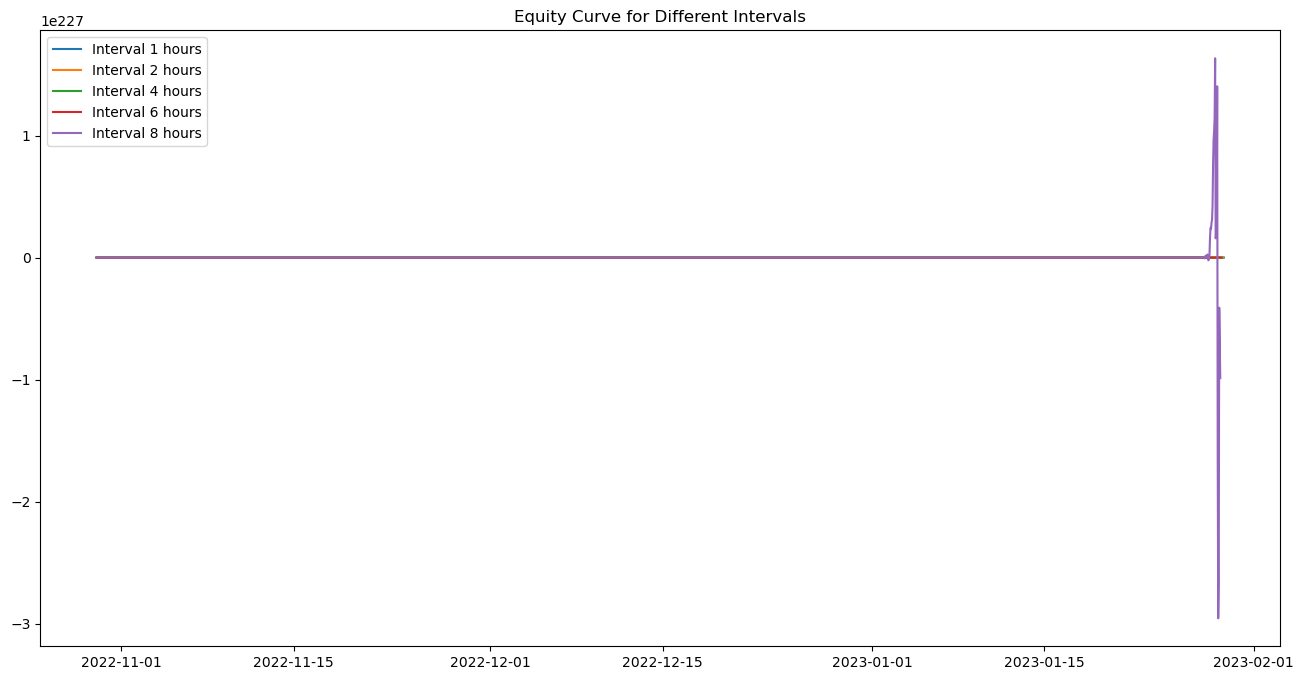

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ... (all the previous code you provided) ...

# Calculate the returns for each interval
initial_investment = 1000

for interval in intervals:
    results_df[f'returns_{interval}h'] = (results_df[f'predicted_changes_{interval}h'] / results_df[f'actual_changes_{interval}h']) + 1

# Calculate the equity curve for each interval
for interval in intervals:
    results_df[f'equity_curve_{interval}h'] = results_df[f'returns_{interval}h'].cumprod() * initial_investment

# Calculate mean, min, and max for each interval
stats_df = pd.DataFrame(columns=['interval', 'mean', 'min', 'max'])

for interval in intervals:
    stats = {
        'interval': interval,
        'mean': results_df[f'equity_curve_{interval}h'].mean(),
        'min': results_df[f'equity_curve_{interval}h'].min(),
        'max': results_df[f'equity_curve_{interval}h'].max()
    }
    stats_df = stats_df.append(stats, ignore_index=True)

print(stats_df)

# Plot equity curves
fig, ax = plt.subplots(figsize=(16, 8))

for interval in intervals:
    ax.plot(results_df.index, results_df[f'equity_curve_{interval}h'], label=f'Interval {interval} hours')

ax.set_title('Equity Curve for Different Intervals')
ax.legend()
plt.show()



In [16]:
results_df

,actual_changes_1h,predicted_changes_1h,actual_changes_2h,predicted_changes_2h,actual_changes_4h,predicted_changes_4h,actual_changes_6h,predicted_changes_6h,actual_changes_8h,predicted_changes_8h,...,equity_curve_1h,equity_curve_2h,equity_curve_4h,equity_curve_6h,equity_curve_8h,returns_1h,returns_2h,returns_4h,returns_6h,returns_8h
Open time,,,,,,,,,,,,,,,,,,,,,
2022-10-29 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-30 00:00:00+00:00,51.89,-54.193,-99.11,-52.408,-24.95,-51.395,-29.98,-52.948,87.66,-51.315,...,-44.382347,1528.786197,3.059920e+03,2766.110740,414.613279,-0.044382,1.528786,3.059920,2.766111,0.414613
2022-10-30 01:00:00+00:00,-99.11,7.912,67.78,5.715,22.10,5.146,58.34,4.825,-40.68,2.447,...,-40.839283,1657.688722,3.772424e+03,2994.881469,389.673291,0.920170,1.084317,1.232851,1.082705,0.939848
2022-10-30 02:00:00+00:00,67.78,-49.649,-24.95,-49.111,-29.98,-48.911,87.66,-49.807,-67.66,-48.972,...,-10.924418,4920.644666,9.926962e+03,1293.238059,671.717045,0.267498,2.968377,2.631454,0.431816,1.723795
2022-10-30 03:00:00+00:00,-24.95,17.690,22.10,14.592,58.34,13.226,-40.68,14.070,-89.86,11.385,...,-3.178809,8169.606067,1.217746e+04,845.945545,586.612454,0.290982,1.660271,1.226706,0.654130,0.873303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-11 12:00:00+00:00,-67.35,37.595,43.78,34.060,-185.91,31.215,-66.25,36.226,22.66,29.203,...,inf,inf,-inf,-inf,-inf,0.441797,1.777981,0.832096,0.453192,2.288747
2023-04-11 13:00:00+00:00,43.78,-44.162,147.38,-41.752,133.84,-42.588,79.59,-39.724,-100.21,-42.162,...,-inf,inf,-inf,-inf,-inf,-0.008725,0.716705,0.681799,0.500892,1.420736
2023-04-11 14:00:00+00:00,147.38,14.459,-185.91,14.573,-66.25,13.483,22.66,16.580,34.22,10.580,...,-inf,inf,-inf,-inf,-inf,1.098107,0.921613,0.796483,1.731686,1.309176
